<a href="https://colab.research.google.com/github/Nikki138/Image_Classifier/blob/master/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
704/704 [==============================] - 122s 173ms/step - loss: 0.6597 - accuracy: 0.5930 - val_loss: 0.5923 - val_accuracy: 0.6916
Epoch 2/10
704/704 [==============================] - 124s 177ms/step - loss: 0.5320 - accuracy: 0.7344 - val_loss: 0.5240 - val_accuracy: 0.7340
Epoch 3/10
704/704 [==============================] - 124s 176ms/step - loss: 0.4582 - accuracy: 0.7862 - val_loss: 0.4379 - val_accuracy: 0.8016
Epoch 4/10
704/704 [==============================] - 127s 180ms/step - loss: 0.4115 - accuracy: 0.8114 - val_loss: 0.4144 - val_accuracy: 0.8084
Epoch 5/10
704/704 [==============================] - 123s 175ms/step - loss: 0.3766 - accuracy: 0.8285 - val_loss: 0.4044 - val_accuracy: 0.8264
Epoch 6/10
704/704 [==============================] - 122s 173ms/step - loss: 0.3395 - accuracy: 0.8479 - val_loss: 0.4373 - val_accuracy: 0.7972
Epoch 7/10
704/704 [==============================] - 122s 173ms/step - loss: 0.3058 - accuracy: 0.8654 - val_loss: 0.4111 -

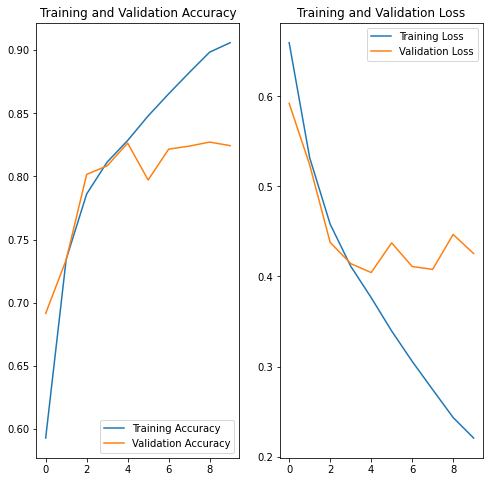

INFO:tensorflow:Assets written to: /content/drive/My Drive/cat-vs-dog.model/assets


In [19]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
import matplotlib.pyplot as plt
import numpy as np


X = pickle.load(open("/content/drive/My Drive/Colab Notebooks/X.pickle","rb"))
Y = pickle.load(open("/content/drive/My Drive/Colab Notebooks/Y.pickle","rb"))

Y = np.array(Y)

X = X/255.0

model = Sequential()                                        #1st layer
model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu")) #Rectified linear unit
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))                                #2nd layer
model.add(Activation("relu")) #Rectified linear unit
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))                                #3nd layer
model.add(Activation("relu")) #Rectified linear unit
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())                                         #4th layer
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(1))                                          #Activation layer
model.add(Activation("sigmoid"))

model.compile(loss = "binary_crossentropy",
               optimizer = "adam",
              metrics=['accuracy'])
history = model.fit(X,Y,batch_size=32,epochs=10, validation_split=0.1)

#analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

model.save('/content/drive/My Drive/cat-vs-dog.model')